In [6]:
from PIL import Image
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install transformers
from transformers import CLIPProcessor, CLIPModel


model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

# Given column names
class_names = [
    "affenpinscher", "afghan_hound", "african_hunting_dog", "airedale", "american_staffordshire_terrier",
    "appenzeller", "australian_terrier", "basenji", "basset", "beagle",
    "bedlington_terrier", "bernese_mountain_dog", "black-and-tan_coonhound", "blenheim_spaniel", "bloodhound",
    "bluetick", "border_collie", "border_terrier", "borzoi", "boston_bull",
    "bouvier_des_flandres", "briard", "brittany_spaniel", "bull_mastiff", "cairn",
    "cardigan", "chesapeake_bay_retriever", "chihuahua", "chow", "clumber",
    "cocker_spaniel", "collie", "curly-coated_retriever", "dandie_dinmont", "dhole",
    "dingo", "doberman", "english_foxhound", "english_setter", "english_springer",
    "entlebucher", "eskimo_dog", "flat-coated_retriever", "french_bulldog", "german_shepherd",
    "german_short-haired_pointer", "giant_schnauzer", "golden_retriever", "gordon_setter", "great_dane",
    "great_pyrenees", "greater_swiss_mountain_dog", "groenendael", "ibizan_hound", "irish_setter",
    "irish_terrier", "irish_water_spaniel", "irish_wolfhound", "italian_greyhound", "japanese_spaniel",
    "keeshond", "kelpie", "kerry_blue_terrier", "komondor", "kuvasz",
    "labrador_retriever", "lakeland_terrier", "leonberg", "lhasa", "malamute",
    "malinois", "maltese_dog", "mexican_hairless", "miniature_pinscher", "miniature_poodle",
    "miniature_schnauzer", "newfoundland", "norfolk_terrier", "norwegian_elkhound", "norwich_terrier",
    "old_english_sheepdog", "otterhound", "papillon", "pekinese", "pembroke",
    "pomeranian", "pug", "redbone", "rhodesian_ridgeback", "rottweiler",
    "saint_bernard", "saluki", "samoyed", "schipperke", "scotch_terrier",
    "scottish_deerhound", "sealyham_terrier", "shetland_sheepdog", "shih-tzu", "siberian_husky",
    "silky_terrier", "soft-coated_wheaten_terrier", "staffordshire_bullterrier", "standard_poodle", "standard_schnauzer",
    "sussex_spaniel", "tibetan_mastiff", "tibetan_terrier", "toy_poodle", "toy_terrier",
    "vizsla", "walker_hound", "weimaraner", "welsh_springer_spaniel", "west_highland_white_terrier",
    "whippet", "wire-haired_fox_terrier", "yorkshire_terrier"
]


prediction_df = pd.DataFrame(columns=class_names)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.2 MB/s eta 0:00:00


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [ ]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import torch
'''
# Initialize your model, processor, class_names
# model = ...
# processor = ...
# class_names = ...

# Path to the folder containing images
folder_path = "/content/data_extracted/test"  # Replace with the actual folder path

# List all files in the folder
file_list = os.listdir(folder_path)

# Filter out only the image files (you can adjust the list of allowed extensions)
image_files = [file for file in file_list if file.lower().endswith(".jpg")]

# Initialize an empty DataFrame to store predictions
columns = [f"Class_{i}" for i in range(len(class_names))]
prediction_df = pd.DataFrame(columns=columns)

# Iterate through image files
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    image = Image.open(image_path)
    # image.show()  # You can display the image if needed

    inputs = processor(text=class_names, images=image, return_tensors="pt", padding=True)
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)

    # Convert tensor values to NumPy array
    probs_numpy = probs.detach().cpu().numpy()

    # Append the probabilities to the DataFrame
    prediction_df = prediction_df.append(pd.Series(probs_numpy[0], index=prediction_df.columns), ignore_index=True)

print(prediction_df)
'''

pekinese


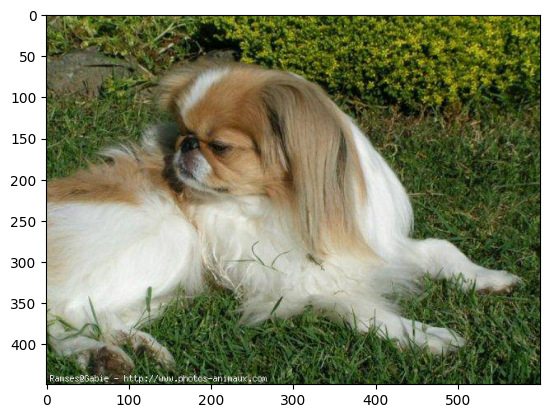

In [12]:

image = Image.open("/content/data_extracted/test/000621fb3cbb32d8935728e48679680e.jpg")
plt.imshow(image)
inputs = processor(text=class_names, images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)

print(class_names[probs.argmax().item()])


siberian_husky


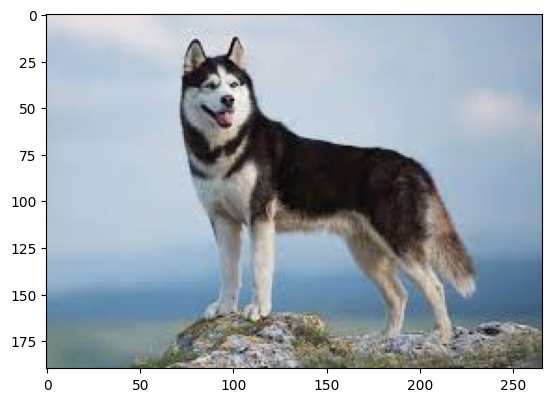

In [13]:

image = Image.open("/content/dog_1.jpg")
plt.imshow(image)
inputs = processor(text=class_names, images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)

print(class_names[probs.argmax().item()])


dandie_dinmont


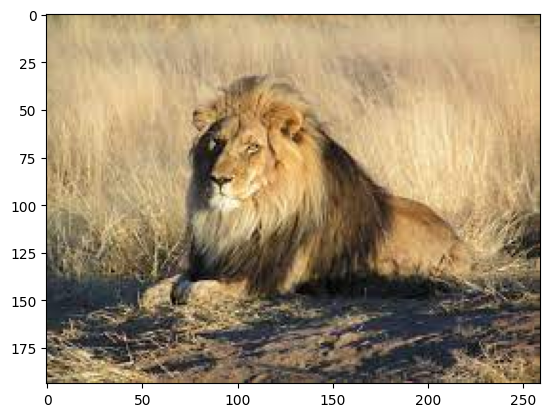

In [14]:

image = Image.open("/content/dog_3.jpg")
plt.imshow(image)
inputs = processor(text=class_names, images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)

print(class_names[probs.argmax().item()])


great_dane


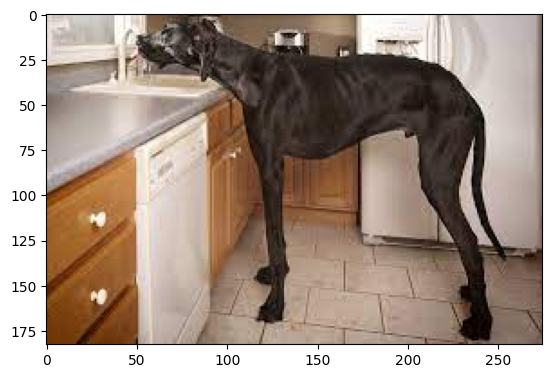

In [15]:
image = Image.open("/content/dog_2.jpg")
plt.imshow(image)
inputs = processor(text=class_names, images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)

print(class_names[probs.argmax().item()])